### Neural Net with TensorFlow

In [ ]:
# Install tensorflow and protobuf -- run once!
# anaconda install instructions: https://www.tensorflow.org/install/install_mac

# # For chase's macbook, the following shell commands worked (take out ! if in terminal)
# !conda create -n tensorflow python=2.7
# !source activate tensorflow
# !pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.4.0-py2-none-any.whl

# Remember to activate container when you want to use package

In [47]:
import sys, csv, json
# !pip install requests,pandas,nltk,matplotlib
import requests
import numpy as np
import pandas as pd
import csv, json
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [48]:
# Import Dataset Pickle
import pickle
import pandas as pd
dfNN_raw = pickle.load(open('NN_pickles.p', 'rb'))
print dfNN_raw.head(5)
# pd.options.display.max_rows = len(dfNN_raw)
# dfNN_raw.head(len(dfNN_raw))


  prev_price compound    neg    neu   pos next_price
0     307.15   0.7424      0   0.69  0.31     307.26
1        463  -0.7003  0.209  0.791     0     467.29
2     465.01  -0.1759  0.253  0.747     0     461.57
3     464.53        0      0      1     0     465.01
4        462        0      0      1     0        465


In [49]:
# Python
# import tensorflow as tf
# hello = tf.constant('Hello, TensorFlow!')
# sess = tf.Session()
# print(sess.run(hello))

In [50]:
dfNN = (dfNN_raw - dfNN_raw.mean()) / (dfNN_raw.max() - dfNN_raw.min())
dfNN.reset_index(inplace=True)
del dfNN['index']
dfNN.head(5)
print dfNN.head(5), type(dfNN)

  prev_price   compound       neg       neu       pos next_price
0  -0.205992   0.342107 -0.041533 -0.237517   0.30568  -0.205298
1   0.468625   -0.46241  0.214909  -0.11359 -0.110987   0.487412
2   0.477325   -0.16998  0.268896 -0.167578 -0.110987   0.462653
3   0.475247 -0.0718898 -0.041533  0.142851 -0.110987   0.477543
4   0.464296 -0.0718898 -0.041533  0.142851 -0.110987     0.4775 <class 'pandas.core.frame.DataFrame'>


In [51]:
dfNN = pd.DataFrame(dfNN)
dfNN = dfNN.dropna()

In [52]:
# Taking straight from LSTM Stock Model
num_epochs = 1000

batch_size = 1

total_series_length = len(dfNN.index)

truncated_backprop_length = 3 #The size of the sequence

state_size = 12 #The number of neurons

num_features = 4
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 100

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 6432
The current configuration gives us 2144 batches of 1 observations each one looking 3 steps in the past


In [53]:
# Split Training-Test
dfTrain = dfNN[dfNN.index < num_batches*batch_size*truncated_backprop_length]
print dfTrain

for i in range(min_test_size,len(dfNN.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(dfNN.index)-i
        break

dfTest =  dfNN[dfNN.index >= test_first_idx]

     prev_price    compound        neg         neu          pos next_price
0     -0.205992    0.342107  -0.041533   -0.237517      0.30568  -0.205298
1      0.468625    -0.46241   0.214909    -0.11359    -0.110987   0.487412
2      0.477325    -0.16998   0.268896   -0.167578    -0.110987   0.462653
3      0.475247  -0.0718898  -0.041533    0.142851    -0.110987   0.477543
4      0.464296  -0.0718898  -0.041533    0.142851    -0.110987     0.4775
5      0.477325  -0.0146195  -0.041533    -0.17494     0.237131   0.462653
6      0.472953  -0.0146195   0.203866   -0.368805      0.18068   0.455857
7      0.462435  -0.0718898  -0.041533    0.142851    -0.110987   0.451701
8      0.472953  -0.0718898  -0.041533    0.142851    -0.110987   0.455857
9      0.472953    0.212845  -0.041533   0.0115631    0.0328301   0.455857
10     0.457197  -0.0718898  -0.041533    0.142851    -0.110987    0.46209
11     0.457197  -0.0718898  -0.041533    0.142851    -0.110987    0.46209
12     0.531216    0.1522

In [54]:
xTrain = dfTrain[['prev_price','neu','neg','pos']].as_matrix()[::-1]
yTrain = dfTrain['next_price'].as_matrix()[::-1]

print xTrain
print yTrain
# xTrain = dfTrain[['prev_price','neu','neg','pos']]
# yTrain = dfTrain['next_price']

[[-0.24399776827917891 -0.0939583371059405 0.10693326826980906
  -0.014212921433712958]
 [-0.24399776827917891 0.14285147884497984 -0.04153298939890261
  -0.11098711498210005]
 [-0.21741998280605976 0.0845692702560228 -0.01883360289583513
  -0.07133657734769144]
 ..., 
 [0.47732506091309879 -0.1675779690077809 0.2688964584538582
  -0.11098711498210005]
 [0.46862451550577483 -0.11359023894643118 0.21490872839250844
  -0.11098711498210005]
 [-0.20599240077852973 -0.23751661931452944 -0.04153298939890261
  0.3056795516845666]]
[-0.245338122498907 -0.245338122498907 -0.24377981585878922 ...,
 0.46265252766125237 0.487412288720901 -0.20529829910699288]


In [55]:
xTrain.shape


(6427, 4)

In [56]:
xTest = dfTest[['prev_price','neu','neg','pos']].as_matrix()
yTest = dfTest['next_price'].as_matrix()

In [57]:
yTest.shape


(107,)

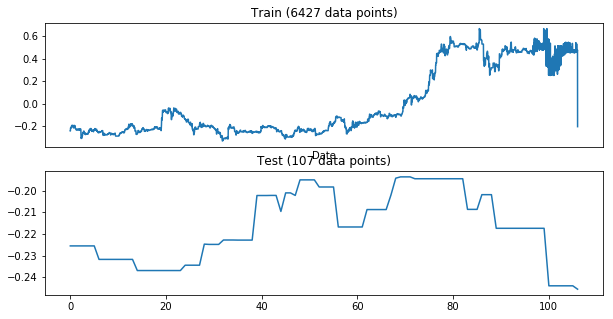

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig,ax = plt.subplots(2,1, figsize = (10,5))
ax[0].plot(xTrain[:,0])
ax[0].set_title('Train (' +str(len(xTrain))+' data points)')
ax[0].set_xlabel('Date')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m.%d.%y'))

ax[1].plot(xTest[:,0])
ax[1].set_title('Test (' +str(len(xTest))+' data points)')

# plt.figure(figsize=(25,5))
# plt.plot(xTrain[:,0])
# plt.title('Train (' +str(len(xTrain))+' data points)')
# plt.xaxis.set_major_locator(mdates.MonthLocator())
# plt.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d.%y'))

plt.show()

# plt.figure(figsize=(10,3))
# plt.plot(xTest[:,0])
# plt.title('Test (' +str(len(xTest))+' data points)')
# plt.show()

In [59]:
# LOAD DATA^

In [60]:
# SETUP NET

In [61]:
tf.reset_default_graph()


In [62]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

In [63]:
# irrelevant if no more classes (random array unif distribution) 
W2 = tf.Variable(initial_value=np.random.rand(state_size,num_classes),dtype=tf.float32)
b2 = tf.Variable(initial_value=np.random.rand(1,num_classes),dtype=tf.float32)

In [64]:
# unpack and create edge from input to hidden layer
labels_series = tf.unstack(batchY_placeholder, axis=1)


In [65]:
# forward pass
cell = tf.contrib.rnn.BasicLSTMCell(num_units=state_size)

states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

In [66]:
# talk about permutations and how data goes through nodes
states_series = tf.transpose(states_series,[1,0,2])


In [67]:
# backwards pass starting point
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

In [68]:
# bp weights and biases
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))

In [69]:
prediction = tf.matmul(last_state,weight) + bias
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


In [70]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    num_epochs = 50
    for epoch_idx in range(num_epochs):
                
        print('Epoch %d' %epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            try:
                batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
                batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
            except:
                print xTrain, start_idx, end_idx, batch_size, truncated_backprop_length, num_features
            #print('IDXs',start_idx,end_idx)
            #print('X',batchX.shape,batchX)
            #print('Y',batchX.shape,batchY)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            #TRAIN!
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
#             if type(loss) != float(1):
#                 print _loss,_train_step,_pred,_last_label,_prediction
            
           
            
            if(batch_idx % 50 == 0):
                print('Step %d - Loss: %.6f' %(batch_idx,_loss))
                
    #TEST
    
    
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        
        #_current_state = np.zeros((batch_size,state_size))
        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        #Test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        test_pred_list.append(test_pred[-1][0]) #The last one
        

Epoch 0
Step 0 - Loss: 0.076313
Step 50 - Loss: 0.000248
Step 100 - Loss: 0.000053
Step 150 - Loss: 0.000078
Step 200 - Loss: 0.000002
Step 250 - Loss: 0.000053
Step 300 - Loss: 0.000044
Step 350 - Loss: 0.000002
Step 400 - Loss: 0.000004
Step 450 - Loss: 0.000092
Step 500 - Loss: 0.004938
Step 550 - Loss: 0.001540
Step 600 - Loss: 0.000002
Step 650 - Loss: 0.000183
Step 700 - Loss: 0.000012
Step 750 - Loss: 0.000000
Step 800 - Loss: 0.000002
Step 850 - Loss: 0.000081
Step 900 - Loss: 0.000039
Step 950 - Loss: 0.000905
Step 1000 - Loss: 0.000024
Step 1050 - Loss: 0.000026
Step 1100 - Loss: 0.000466
Step 1150 - Loss: 0.000044
Step 1200 - Loss: 0.000492
Step 1250 - Loss: 0.000006
Step 1300 - Loss: 0.000003
Step 1350 - Loss: 0.000453
Step 1400 - Loss: 0.000002
Step 1450 - Loss: 0.000299
Step 1500 - Loss: 0.000592
Step 1550 - Loss: 0.004701
Step 1600 - Loss: 0.001776
Step 1650 - Loss: 0.000077
Step 1700 - Loss: 0.000206
Step 1750 - Loss: 0.003067
Step 1800 - Loss: 0.001073
Step 1850 - Loss

KeyboardInterrupt: 

## WOOO!

In [ ]:
plt.figure(figsize=(21,7))
plt.plot(yTest,label='Price',color='blue')
plt.plot(test_pred_list,label='Predicted',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)), y=loss_list)
plt.xlabel('X')
plt.ylabel('loss')
plt.show()

### Now we split the data into disjoint time intervals

In [86]:
dfNN_sorted = pickle.load(open('NN_pickled_time.p', 'rb'))
dfNN_sorted = dfNN_sorted.sort_values('datetime')
dfNN_mean = dfNN_sorted.mean()
dfNN_max = dfNN_sorted.max()
dfNN_min = dfNN_sorted.min()
dfNN_sorted = (dfNN_sorted - dfNN_mean) / (dfNN_max - dfNN_min)
dfNN_sorted.reset_index(inplace=True)
del dfNN_sorted['index']
dfNN_sorted.head(5)
print dfNN_sorted.head(5), type(dfNN)


  prev_price    compound        neg        neu        pos next_price  datetime
0  -0.245556  0.00428477  -0.041533  0.0894772 -0.0525194  -0.241053 -0.566531
1  -0.243998  -0.0718898  -0.041533   0.142851  -0.110987  -0.245338  -0.56593
2  -0.243998  -0.0975415   0.106933 -0.0939583 -0.0142129  -0.245338  -0.56593
3  -0.243998   -0.134988  0.0652155 -0.0350626 -0.0330301  -0.245338  -0.56593
4  -0.243998    -0.16669  0.0382216  0.0630969  -0.110987  -0.245338  -0.56593 <class 'pandas.core.frame.DataFrame'>


In [87]:
dfNN_sorted = pd.DataFrame(dfNN_sorted)
dfNN_sorted = dfNN_sorted.dropna()

In [88]:
Train2 = dfNN_sorted.iloc[:6300, :]
Test2 = dfNN_sorted.iloc[6300:, :]
# Test2 = pd.DataFrame(Test2, columns = ['prev_price', 'compound', 'neg', 'neu','pos','next_price'])

print len(dfNN), len(Train2), dfNN.head(3), Test2.head(4)

xTrain2 = Train2[['prev_price','neu','neg','pos']].as_matrix()[::-1]
yTrain2 = Train2['next_price'].as_matrix()[::-1]


xTest2 = Test2[['prev_price','neu','neg','pos']].as_matrix()
yTest2 = Test2['next_price'].as_matrix()

6432 6300   prev_price  compound       neg       neu       pos next_price
0  -0.205992  0.342107 -0.041533 -0.237517   0.30568  -0.205298
1   0.468625  -0.46241  0.214909  -0.11359 -0.110987   0.487412
2   0.477325  -0.16998  0.268896 -0.167578 -0.110987   0.462653      prev_price   compound       neg        neu        pos next_price  \
6300   0.473516    0.33338 -0.041533 -0.0945718   0.149094   0.457501   
6301   0.473516   0.117933 -0.041533  -0.129541     0.1874   0.457501   
6302   0.479792  0.0560344 -0.041533  0.0815018 -0.0437828   0.473734   
6303   0.479792   0.128166 -0.041533  0.0661644 -0.0269817   0.473734   

      datetime  
6300  0.417243  
6301  0.417243  
6302  0.417844  
6303  0.417844  


In [89]:
tf.reset_default_graph()

batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

# irrelevant if no more classes (random array unif distribution) 
W2 = tf.Variable(initial_value=np.random.rand(state_size,num_classes),dtype=tf.float32)
b2 = tf.Variable(initial_value=np.random.rand(1,num_classes),dtype=tf.float32)

# unpack and create edge from input to hidden layer
labels_series = tf.unstack(batchY_placeholder, axis=1)

# forward pass
cell = tf.contrib.rnn.BasicLSTMCell(num_units=state_size)
states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

# talk about permutations and how data goes through nodes
states_series = tf.transpose(states_series,[1,0,2])

# backwards pass starting point
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

# bp weights and biases
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))

prediction = tf.matmul(last_state,weight) + bias
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


In [ ]:
loss_list2 = []
test_pred_list2 = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    num_epochs = 750
    for epoch_idx in range(num_epochs):
                
        print('Epoch %d' %epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            try:
                batchX = xTrain2[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
                batchY = yTrain2[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
            except:
                pass
#                 print xTrain2, start_idx, end_idx, batch_size, truncated_backprop_length, num_features
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            #TRAIN!
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list2.append(_loss)
            
#             if type(loss) != float(1):
#                 print _loss,_train_step,_pred,_last_label,_prediction
            
           
            
            #if(batch_idx % 50 == 0):
              #  print('Step %d - Loss: %.6f' %(batch_idx,_loss))
                
    #TEST
    
    
    for test_idx in range(len(xTest2) - truncated_backprop_length):
        
        try:
            testBatchX = xTest2[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
            testBatchY = yTest2[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))
        except:
            pass
        
        #_current_state = np.zeros((batch_size,state_size))
        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        #Test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        test_pred_list2.append(test_pred[-1][0]) #The last one
        

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


In [102]:
avgloss = sum(loss_list2)/float(len(loss_list2))
print avgloss

0.000526932814673


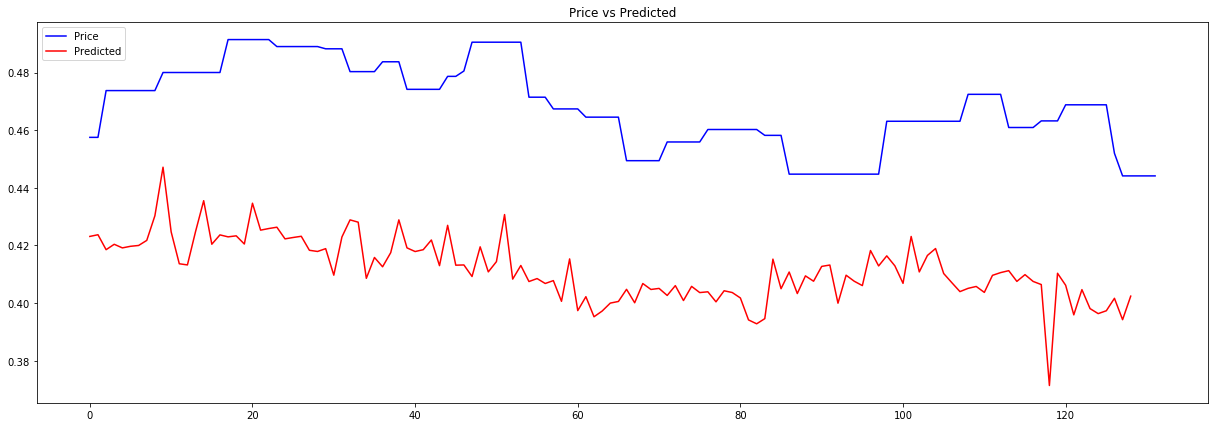

In [103]:
def unnorm(list):
    new_list = []
    for item in list:
#         print type(item)
        new_item = (float(item) + dfNN_mean) * (dfNN_max - dfNN_min)
        new_list.append(new_item)
    return new_item

unnorm_yTest2 = list(unnorm(yTest2))
unnorm_test_pred_list2 = list(unnorm(test_pred_list2))

#print type(unnorm_yTest2), 'datetime' in unnorm_yTest2, unnorm_yTest2

# print yTest2, test_pred_list2

plt.figure(figsize=(21,7))
plt.plot(yTest2,label='Price',color='blue')
plt.plot(test_pred_list2,label='Predicted',color='red')
# plt.plot(unnorm_yTest2,label='Price',color='blue')
# plt.plot(unnorm_test_pred_list2,label='Predicted',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list2)), y=loss_list2)
plt.xlabel('X')
plt.ylabel('loss')
plt.show()

In [38]:
# Creates a graph.
with tf.device('/GPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

InvalidArgumentError: Cannot assign a device for operation 'b_2': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: b_2 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,2] values: [1 2][3]...>, _device="/device:GPU:0"]()]]

Caused by op u'b_2', defined at:
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-cbd8d59593b6>", line 4, in <module>
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/constant_op.py", line 214, in constant
    name=name).outputs[0]
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/chasedavis/anaconda3/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'b_2': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: b_2 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,2] values: [1 2][3]...>, _device="/device:GPU:0"]()]]


In [42]:
from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices()) 

[u'/device:CPU:0']
